In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("archive/cnbc_headlines.csv")

In [18]:
df.head(10)

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
6,Cramer's lightning round: I would just stay lo...,"7:23 PM ET Thu, 16 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
7,Acorns CEO: Parents can turn $5 into five figu...,"8:03 PM ET Thu, 16 July 2020","Investing $5 per day can compound to $70,000 b..."
8,Dividend cuts may mean rethinking your retirem...,"8:54 AM ET Thu, 16 July 2020",Hundreds of companies have cut or suspended th...
9,NaN,NaN,NaN


In [19]:
df.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [21]:
review_df = df[['Headlines']]

print(review_df.shape)
review_df.head(5)

(3080, 1)


,Headlines
0,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne
2,NaN
3,"Cramer's week ahead: Big week for earnings, ev..."
4,IQ Capital CEO Keith Bliss says tech and healt...


In [10]:
first_row = df.head(1)

last_row = df. tail(1)

print(first_row)

print (last_row)

                                           Headlines   
0  Jim Cramer: A better way to invest in the Covi...  \

                             Time   
0   7:51  PM ET Fri, 17 July 2020  \

                                         Description  
0  "Mad Money" host Jim Cramer recommended buying...  
                                              Headlines   
3079  Cramer: Never buy a stock all at once — you'll...  \

                               Time   
3079   6:52  PM ET Fri, 22 Dec 2017  \

                                            Description  
3079  Jim Cramer doubled down on his key investing r...  


In [12]:
# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Filter data within the specified time frame
start_date = pd.to_datetime('2019-07-01')
end_date = pd.to_datetime('2020-07-31')
df_filtered = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]

/Users/tiagorocha/opt/anaconda3/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname ET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/var/folders/ms/f642sm1j05dg1xy8j5xk2p580000gn/T/ipykernel_90469/4226706754.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [13]:
from textblob import TextBlob

# Perform sentiment analysis on headlines
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to filtered headlines
df_filtered['Sentiment'] = df_filtered['Headlines'].apply(analyze_sentiment)

/var/folders/ms/f642sm1j05dg1xy8j5xk2p580000gn/T/ipykernel_90469/717215587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment'] = df_filtered['Headlines'].apply(analyze_sentiment)


<Figure size 1200x600 with 0 Axes>

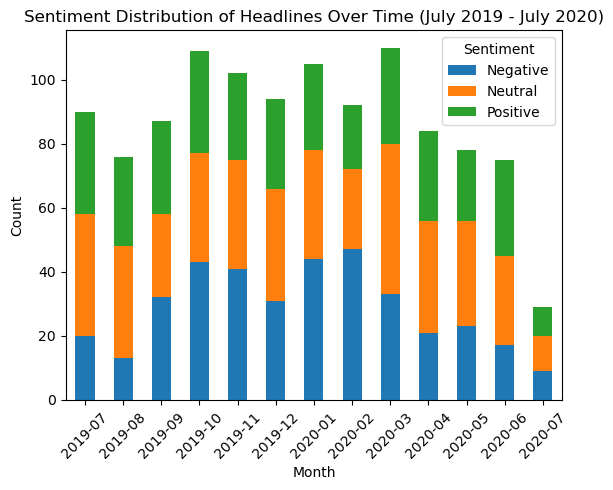

In [22]:
# Group by month and calculate sentiment distribution
df_sentiment_by_month = df_filtered.groupby(df_filtered['Time'].dt.strftime('%Y-%m'))['Sentiment'].value_counts().unstack().fillna(0)

# Plot sentiment distribution over time
plt.figure(figsize=(12, 6))
df_sentiment_by_month.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Headlines Over Time (July 2019 - July 2020)')
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=45)
plt.show()